# Polynomial Regression - Lab

## Introduction

In this lab you'll practice your knowledge on adding polynomial terms to your regression model! 

## Objectives

You will be able to:

- Understand how to account for non-linear relationships between predictors and target variable using polynomial terms

## Create the best plot using polynomials!

Here is a plot with a clearly non-linear shape. Begin to think about what degree polynomial you believe will fit it best.

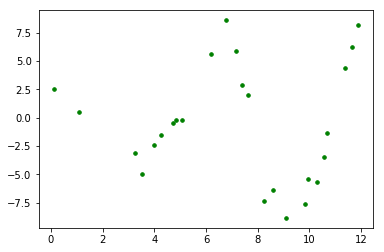

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

def pol(x):
    return x * np.cos(x)

x = np.linspace(0, 12, 100)
rng = np.random.RandomState(1234)
rng.shuffle(x)
x = np.sort(x[:25])
y = pol(x) + np.random.randn(25)*2

plt.scatter(x, y, color='green', s=50, marker='.')

plt.show();

Now it's time to determine the optimal degree of polynomial features for a model that is fit to this data     
- Plot a polynomial function using `PolynomialFeatures` for polynomials up until the second, third and fourth degree. Make sure to label each degree polynomial in your plot.   
- Print out the $R^2$ value for each of the three results. Draw conclusions with respect to which degree is best.

In [38]:
from sklearn.preprocessing import PolynomialFeatures
X = x.reshape(-1,1)
x_2 = X**2

# poly = PolynomialFeatures(2)
# X_2 = poly.fit_transform(X)

## Solution

R2 result for straight line: 3.274412516052205e-05


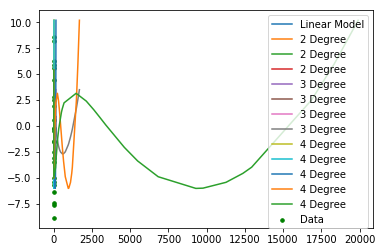

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg1 = LinearRegression().fit(X, y)

plt.scatter(x, y, color='green', s=50, marker='.', label = "Data")
plt.plot(x, reg1.predict(X), label = "Linear Model")

print("R2 result for straight line: {}".format(r2_score(y, reg1.predict(X))))

X_smooth = np.linspace(0, 12, 100).reshape(-1, 1)

for degree in range(2, 5):
    poly = PolynomialFeatures(degree)
    poly_X = poly.fit_transform(X)
#     X_plot = poly.fit_transform(X_smooth)
    reg_poly = LinearRegression().fit(poly_X, y)
#     y_poly_pred = reg_poly.predict(X_plot)
#     print("R2 result for {} degree: {}".format(degree, r2_score(y, reg_poly.predict(X))))
    predict_X = reg_poly.predict(poly_X)
    plt.plot(poly_X, predict_X, label="{} Degree".format(degree))

plt.legend()
plt.show()

## Summary

Great! You now know how to include polynomials in your linear model!